In [1]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
boston = load_boston()

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


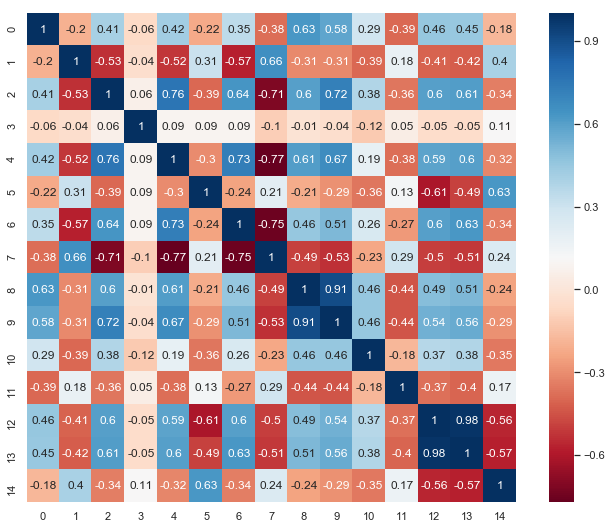

In [22]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(bos.corr().round(2), square=True, cmap='RdBu', annot=True)

From the above heatmap we see that the feature "RM" this is positively coorelated to the target.Where as the "LSTAT" is negetively correlated to the tagert.So we haev added two new feature to the dataset to minimise the Mean square error.

In [24]:
bos = pd.DataFrame(boston.data)

#Multiplying the negative and positive correlated feature.This is done base on the heatmap and 
bos[13] = bos[5] * bos[12]
bos[14] = bos[5] // bos[12]
bos[15] = bos[10] // bos[12]
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,32.74350,1.0,3.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,58.68794,0.0,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,28.95555,1.0,4.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,20.57412,2.0,6.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,38.09351,1.0,3.0


In [25]:
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
bos.isnull().sum()/len(bos)*100

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
PRICE    0.0
dtype: float64

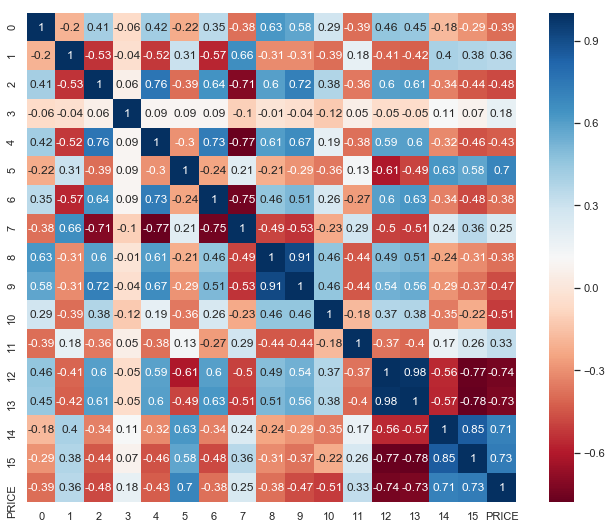

In [26]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(bos.corr().round(2), square=True, cmap='RdBu', annot=True)

In [27]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 16)
(152, 16)
(354,)
(152,)


In [28]:
from sklearn import preprocessing
std_bos_df = preprocessing.StandardScaler()
X_train = std_bos_df.fit_transform(X_train)
X_test=std_bos_df.transform(X_test)

y_im = pd.DataFrame(Y_train)
print(y_im.shape)
df_bos_train=pd.DataFrame(X_train)

y_im = y_im.set_index(df_bos_train.index)

df_bos_train['PRICE']= y_im

print("% of NaN Before Imputation in Price:",df_bos_train['PRICE'].isnull().sum()/len(df_bos_train['PRICE'])*100)

(354, 1)
% of NaN Before Imputation in Price: 0.0


In [72]:
#Function to sample the dataset randomly into equal batch size.
from sklearn.metrics import mean_squared_error

def random_sampling(dataset,batch_size):
    data_rand=dataset.sample(batch_size)
    x=np.array(data_rand.drop('PRICE',axis=1))
    y=np.array(data_rand['PRICE'])
    return x,y

def sgd_manual_algo(bsize):
    Wj,Bj,iteration,lr,k=np.zeros(shape=(1,16)),0,1000,0.01,len(X_train[:bsize])

    while iteration >=0:
        w0,b0,w_interm,b_interm=Wj,Bj,np.zeros(shape=(1,16)),0
        
        x,y =random_sampling(df_bos_train,bsize)
        for i in range(k):
            w_interm+=(-2)*x[i]*(y[i]-(np.dot(w0,x[i])+b0))
            b_interm+=(-2)*(y[i]-(np.dot(w0,x[i])+b0))

        Wj=(w0-lr*(w_interm)/k)
        Bj=(b0-lr*(b_interm)/k)

        iteration-=1

    print(Wj)
    print(Bj)
    return Wj,Bj
 
W,B = sgd_manual_algo(22)

Y_pred_m=list()

for i in range(len(X_test)):
    Y_lr=np.dot(W,X_test[i])+B
    Y_pred_m.append(np.asscalar(Y_lr))
    
MSE_custom=mean_squared_error(Y_test,Y_pred_m)
print('MEAN SQUARED ERROR =',MSE_custom)

[[-1.35756398  0.30655206 -0.48671047  0.34853544 -1.3423425   2.14025056
   0.40739787 -2.5359285   2.25033218 -1.22083004 -1.85422813  0.96385508
  -0.26265522 -2.43680204  1.65551559  1.03975033]]
[22.66295913]
MEAN SQUARED ERROR = 20.911285794270444


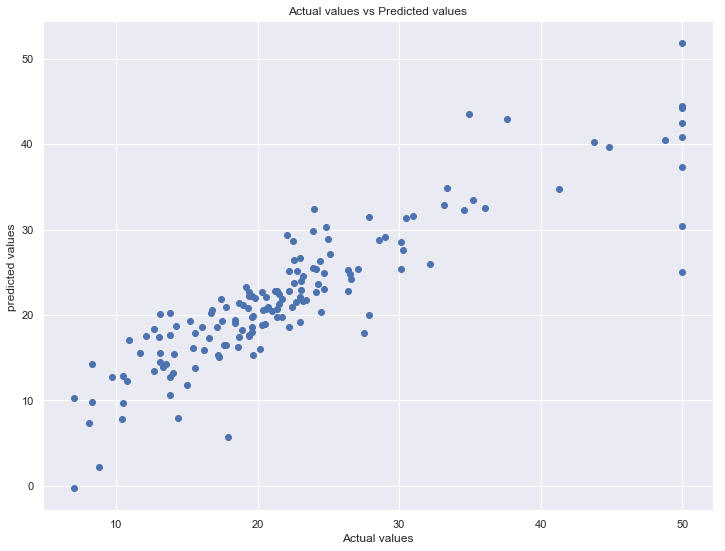

In [74]:
#Plot a chart of predicted values Vs actual values of your own SGD Implementation

plt.scatter(Y_test,Y_pred_m)
plt.xlabel('Actual values')
plt.ylabel('predicted values ')
plt.title('Actual values vs Predicted values')
plt.show()

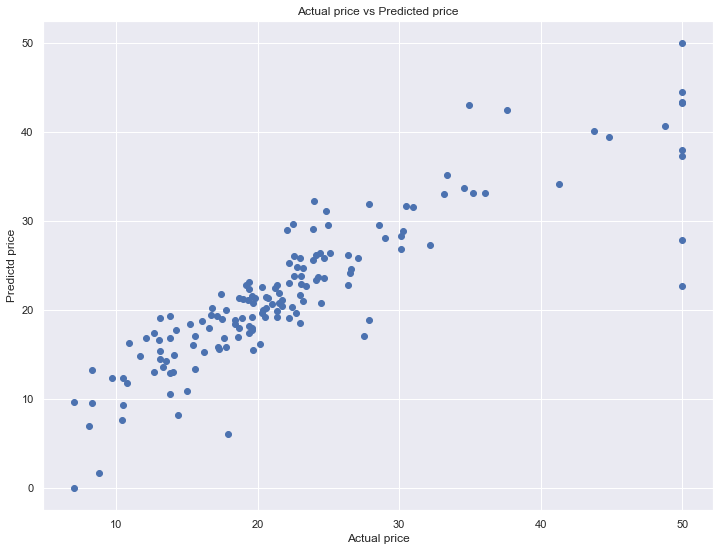

Mean squared error = 22.05179989544648


In [75]:
#SGDRegresser of sklearn and plot the chart of predicted values Vs actual values
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.0001  )
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


MSE_sgd=mean_squared_error(Y_test,Y_pred)
print('Mean squared error =',MSE_sgd)

In [77]:
#In a tabular format,compare the weights obtained from your own 
#implementation with the weights obtained after applying sklearn's SGDRegresser.

# Creating the table using PrettyTable library

from prettytable import PrettyTable


Serialno = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

sgd_weights = sgd.coef_ 
table = PrettyTable()
table.add_column("Slno.",Serialno)
table.add_column("Weights of Custom SGD",W.ravel())
table.add_column("Weights of Sklearn's SGD",sgd_weights)

# Printing the Table
print(table)

+-------+-----------------------+--------------------------+
| Slno. | Weights of Custom SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |  -1.3575639834566262  |   -1.3824691036356829    |
|   2   |  0.30655205643127653  |    0.3830994462640419    |
|   3   |  -0.4867104679346232  |   -0.36359539396217694   |
|   4   |   0.3485354390639499  |   0.12639668626377307    |
|   5   |   -1.34234250114463   |   -1.4301536007120645    |
|   6   |   2.1402505628388995  |    2.3651298592516983    |
|   7   |  0.40739787058751004  |    0.1688423436700921    |
|   8   |  -2.5359285003450798  |   -2.3123327007103605    |
|   9   |    2.25033217611435   |    2.3882373498743497    |
|   10  |  -1.2208300401338077  |   -1.6261306063107994    |
|   11  |  -1.8542281301947343  |   -1.9680034763345966    |
|   12  |   0.9638550805203904  |    0.8980562420044758    |
|   13  |  -0.26265521622475735 |    0.6025231801609081    |
|   14  |   -2.436802038

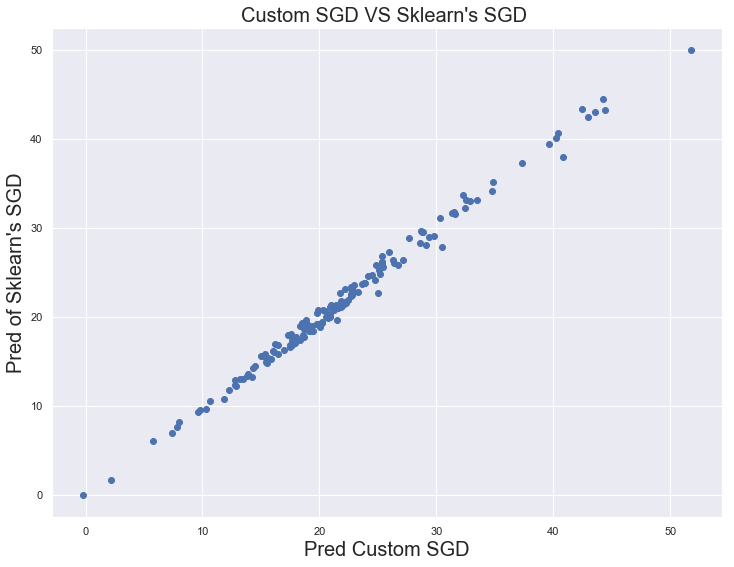

In [78]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.scatter(Y_pred_m, Y_pred)
plt.xlabel("Pred Custom SGD",size=20)
plt.ylabel("Pred of Sklearn's SGD",size=20)
plt.title("Custom SGD VS Sklearn's SGD ",size=20)
plt.show()

In [79]:
# Mean Squared Error (MSE)
print("Mean Squared Error the custom SGD     : ",MSE_custom)
print("Mean Squared Error the Sklearn's  SGD : ",MSE_sgd)

Mean Squared Error the custom SGD     :  20.911285794270444
Mean Squared Error the Sklearn's  SGD :  22.05179989544648
